In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
#load data file and look on some of the column
amazon_data_ungraph = pd.read_csv("com-amazon.ungraph.txt")
amazon_data_ungraph.head(10)

,# Undirected graph: ../../data/output/amazon.ungraph.txt
0,# Amazon
1,# Nodes: 334863 Edges: 925872
2,# FromNodeId\tToNodeId
3,1\t88160
4,1\t118052
5,1\t161555
6,1\t244916
7,1\t346495
8,1\t444232
9,1\t447165


In [4]:
#delete first four rows and create a new file 
with open('com-amazon.ungraph.txt') as fin, open('com-amazon.ungraph_processed.txt', 'w') as fout:
    count = 0
    for line in fin:
        count = count + 1
        
        if count >= 4:
            #print(line)
            fout.write(line.replace('\t', ','))
        else: 
            print(line)
            print('skip')

# Undirected graph: ../../data/output/amazon.ungraph.txt

skip
# Amazon

skip
# Nodes: 334863 Edges: 925872

skip


In [5]:
#let try to load them as csv file, csv file are easy to handle and python give a lots of functionalities 
amazon_data_ungraph_processed = pd.read_csv("com-amazon.ungraph_processed.txt")
amazon_data_ungraph_processed.head(10)

,# FromNodeId,ToNodeId
0,1,88160
1,1,118052
2,1,161555
3,1,244916
4,1,346495
5,1,444232
6,1,447165
7,1,500600
8,2,27133
9,2,62291


In [6]:
# how this data distribution looks like
amazon_data_ungraph_processed.describe() #seems like these are not so useful

,# FromNodeId,ToNodeId
count,925872.000000,925872.000000
mean,185662.827571,368949.221348
std,133061.964633,132601.362414
min,1.000000,366.000000
25%,73349.000000,273732.000000
50%,162058.000000,392319.000000
75%,277243.000000,482703.000000
max,548411.000000,548551.000000


In [7]:
#change the colum name of the csv file
amazon_data_ungraph_processed = amazon_data_ungraph_processed.rename(columns={'# FromNodeId': 'target', 'ToNodeId': 'source'})
amazon_data_ungraph_processed.head(5)

,target,source
0,1,88160
1,1,118052
2,1,161555
3,1,244916
4,1,346495


In [8]:
#check tolal numbers of rows. The data set is huge!!
amazon_data_ungraph_processed.shape

(925872, 2)

In [9]:
#how many unique data are here, lets see!!
print('Size of unique data in first column: \n', amazon_data_ungraph_processed['target'].unique().size)
print('Size of unique data in second column: \n', amazon_data_ungraph_processed['source'].unique().size)

Size of unique data in first column: 
 265933
Size of unique data in second column: 
 264147


In [10]:
#print out the frequently used data from the first column, first column indicate the product id and the second column indicate the community
print('Most used data in first column: \n', amazon_data_ungraph_processed['target'].value_counts().nlargest(5))
print("\n")
print('Most used data in second column:\n', amazon_data_ungraph_processed['source'].value_counts().nlargest(5))

Most used data in first column: 
 222074    168
45146     165
21209     163
38365     142
10489     140
Name: target, dtype: int64


Most used data in second column:
 548091    546
458358    279
515301    216
502784    195
454004    167
Name: source, dtype: int64


In [11]:
#lets sort the data 
amazon_data_ungraph_processed['Frequency'] = amazon_data_ungraph_processed.groupby('target')['source'].transform('count')
amazon_data_ungraph_processed.sort_values('Frequency', inplace=True, ascending=False)
amazon_data_ungraph_processed.head(5)

,target,source,Frequency
592011,222074,337772,168
591951,222074,236190,168
592084,222074,480040,168
591983,222074,281548,168
591984,222074,284825,168


In [12]:
#drop the last column
amazon_data_ungraph_processed.drop(columns=['Frequency'], inplace= True)
amazon_data_ungraph_processed.head(5)

,target,source
592011,222074,337772
591951,222074,236190
592084,222074,480040
591983,222074,281548
591984,222074,284825


In [13]:
#let's sample first 10000 rows
amazon_data_new = amazon_data_ungraph_processed[:10000]
amazon_data_new.head()


,target,source
592011,222074,337772
591951,222074,236190
592084,222074,480040
591983,222074,281548
591984,222074,284825


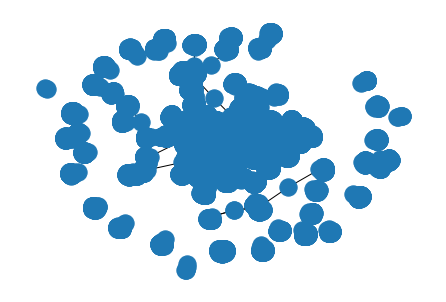

In [14]:
# Draw a graph with first 10000 rows, it may took some time to draw the graph with networkx library
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(amazon_data_new, create_using=Graphtype)
nx.draw(G) # we can see lots of unconnected groups there

# The size of the network largest connected component

In [15]:
#How many connected components are there within 10000 rows
largest_cc = max(nx.connected_components(G), key=len)
#size of the largest connect component
print("The size of largest connect component - " , len(largest_cc))

The size of largest connect component -  5789


# Draw the largest connect component

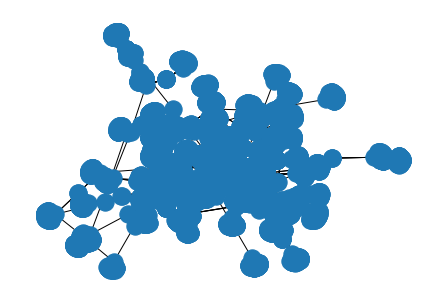

In [16]:
# let's create a variable that store all the connected components seperatly
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
# draw the largest connected component
nx.draw(S[0])

# The number of connected components 

In [17]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(amazon_data_ungraph_processed, create_using=Graphtype)
print("the number of connected components are -:",  len(G))

the number of connected components are -: 334863


# Degree distribution 

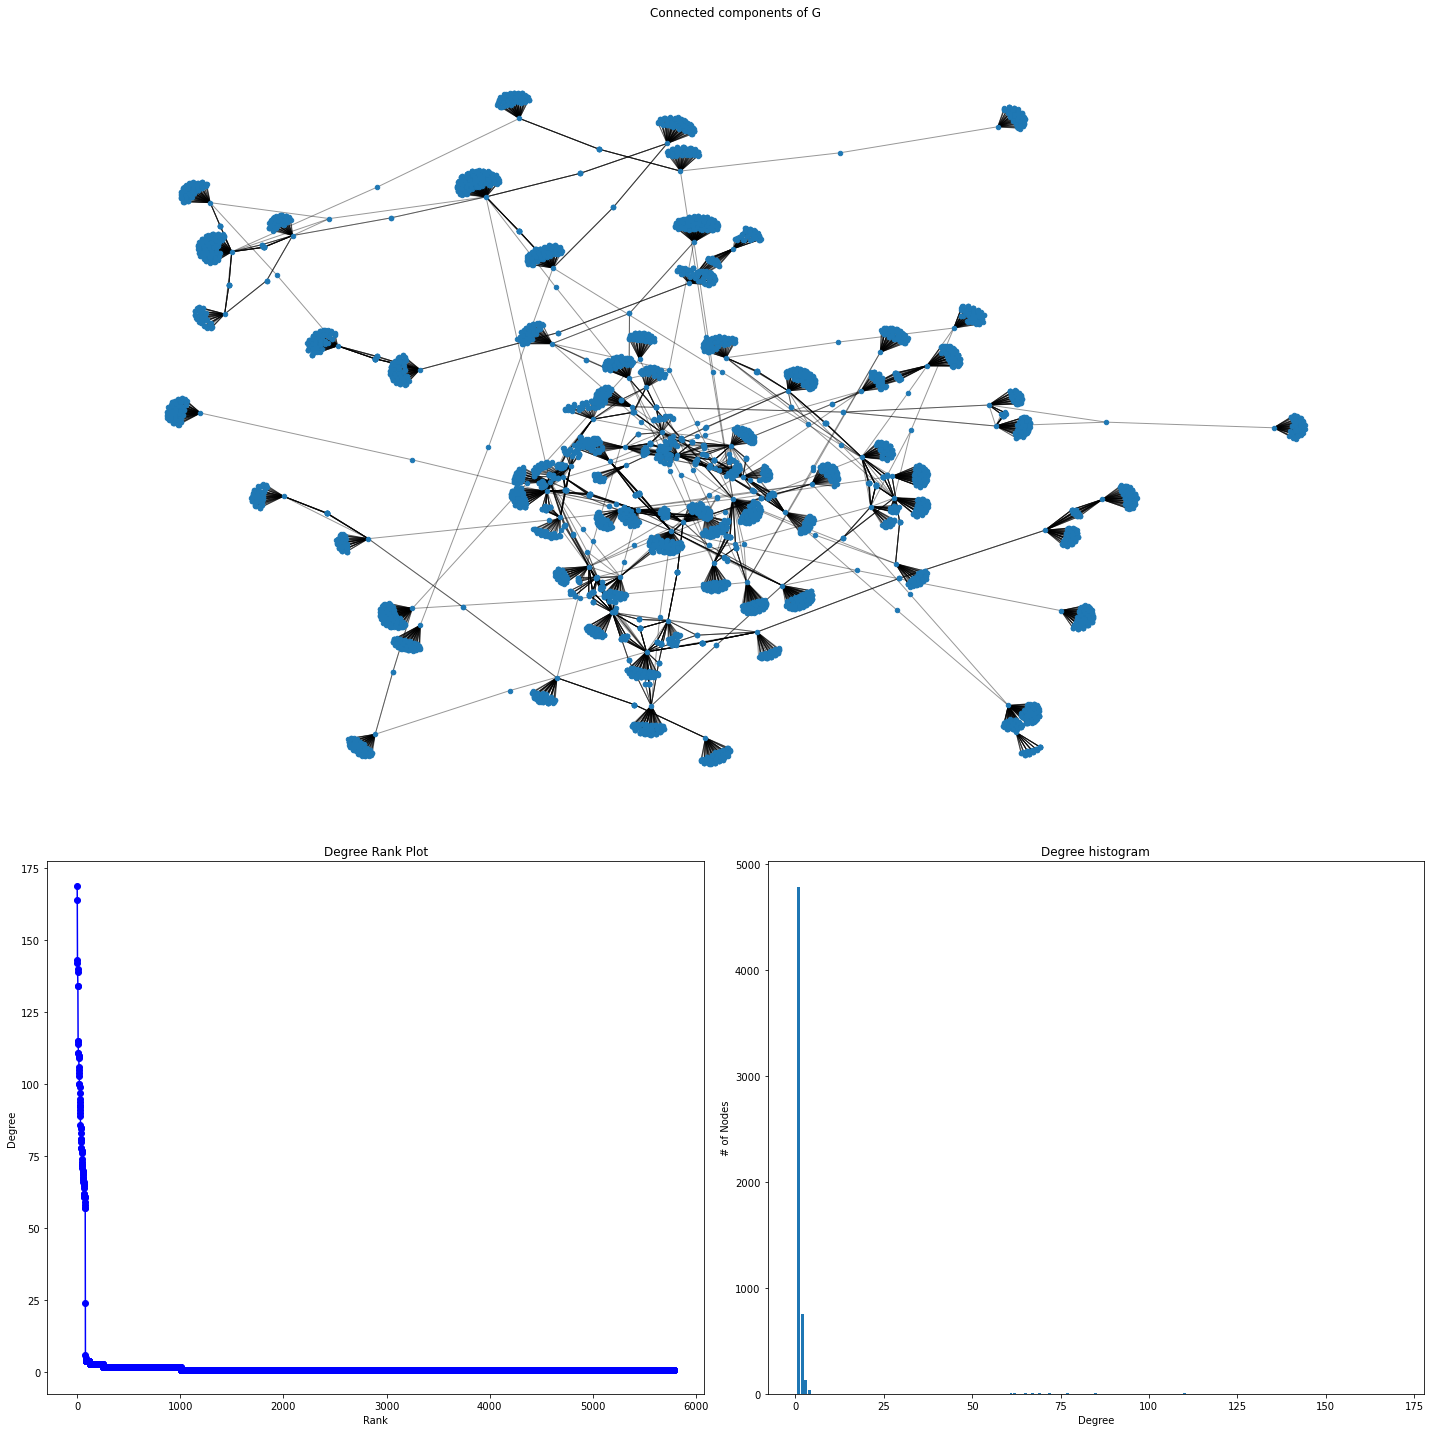

In [27]:
degree_sequence = sorted((d for n, d in S[0].degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(20,20))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
# labels = [5, 10, 20,30, 40, 50]
# plt.xticks(labels, )
fig.tight_layout()
plt.show()

In [18]:
#average shortest path
print(nx.average_shortest_path_length(S[0]))

10.299325281856792


In [24]:
#clustering coefficient
print(nx.average_clustering(S[0]))

0.11433113562253526
